# Unsupervised Handwritten Signature Verification System Using Extreme Learning Machine


## Overview


Unsupervised signature verification attempts to tell a forged signature from a real one based on the signature features alone. This idea is inspired by the existence of a generative model for genuine and forged signatures. This model generates a handwriting process for creating a genuine signature from a sequence of characters and generates an imitation process that omits some signature features for creating a skilled forgery of that signature. A method that could reverse this generative model would tell a genuine signature from a forged one without the need for ground truth training data samples

## Obtaining Dataset

In [3]:
        # Importing libraries
import tensorflow as tf
import numpy as np
import cv2
import pandas as pd
from google.colab.patches import cv2_imshow
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from scipy.special import expit
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, RegressorMixin
from scipy.linalg import pinv




In [4]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os

### Getting signature images into workspace


In [6]:
g_dataset = []
g_lables = []
f_dataset = []
f_labels = []


In [7]:
#extrating the genuine and forged image paths tor test

test_genuine_image_paths = []
test_forged_image_paths = []

# for genuine
for i in range (1,6):
    directroy_path = f"/content/drive/MyDrive/Final_Project/New folder (10)/test/{i}/genuine/"
    for file in os.listdir(directroy_path):
        test_genuine_image_paths.append(file)


# for forged
for i in range (1,6):
    directroy_path = f"/content/drive/MyDrive/Final_Project/New folder (10)/test/{i}/forge/"
    for file in os.listdir(directroy_path):
        test_forged_image_paths.append(file)



In [8]:
print(len(test_genuine_image_paths))
print(len(test_forged_image_paths))

16
28


In [9]:
#extrating the genuine and forged image paths tor train

train_genuine_image_paths = []
train_forged_image_paths = []

# for genuine
for i in range (1,6):
    directroy_path = f"/content/drive/MyDrive/Final_Project/New folder (10)/train/genuine/"
    for file in os.listdir(directroy_path):
        train_genuine_image_paths.append(file)


# for forged
for i in range (1,6):
    directroy_path = f"/content/drive/MyDrive/Final_Project/New folder (10)/train/forge/"
    for file in os.listdir(directroy_path):
        train_forged_image_paths.append(file)



In [10]:
training_image_paths = []
print(len(train_genuine_image_paths))
print(len(train_forged_image_paths))
print(train_forged_image_paths[:5])

12095
12085
['cf-101-11 (Copy).jpg', 'cf-122-15 (Copy).jpg', 'cf-103-05 (Copy).jpg', 'cf-116-09 (Copy).jpg', 'cf-121-06 (Copy).jpg']


In [11]:
for image in train_genuine_image_paths[:40]:
 img_path = f"/content/drive/MyDrive/Final_Project/New folder (10)/train/genuine/{image}"
 image = cv2.imread(img_path)

 g_dataset.append(image)
 g_lables.append(0)


for image in train_forged_image_paths[:40]:
  img_path = f"/content/drive/MyDrive/Final_Project/New folder (10)/train/forge/{image}"
  image = cv2.imread(img_path)

  f_dataset.append(image)
  f_labels.append(1)

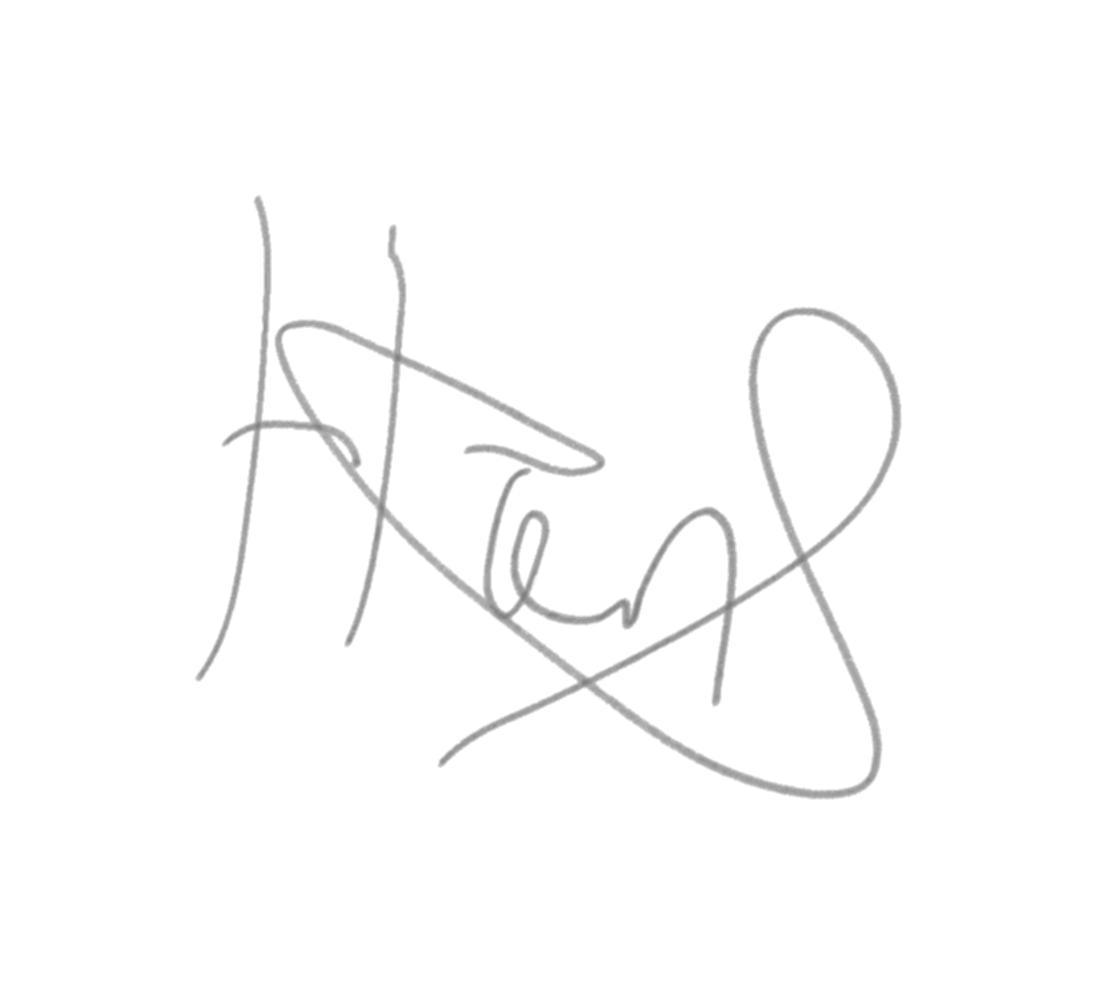

In [12]:
cv2_imshow(f_dataset[2])

In [13]:

from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from skimage.util import view_as_windows
import cv2
from skimage import io
import imutils
import numpy as np
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers.legacy import SGD




In [14]:
# Load the pre-trained InceptionV3 model
base_model = InceptionV3(weights='imagenet', include_top=False)

# Remove the top layer and add GlobalAveragePooling2D
# base_model.layers.pop(0)

x = base_model.output
x = GlobalAveragePooling2D()(x)

x = Dense(1024, activation='relu')(x)


# Create a new model with the desired outputs
model = Model(inputs=base_model.input, outputs=x)

# Freeze the pre-trained layers
# for layer in base_model.layers:
#     layer.trainable = False

87910968/87910968 [==============================] - 0s 0us/step


In [15]:
print(g_dataset[0].shape)
print(g_dataset[0].dtype)
print(type(g_dataset[0]))

(760, 1134, 3)
uint8
<class 'numpy.ndarray'>


In [16]:

def sliding_window_pathes(image,window_sizes, overlap):
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (299,299))
    # Slide the window across the image
    height, width = image.shape[:2]
    for window_size in window_sizes:
      stride= int(window_size * (1 - overlap))

    # Slide the window across the image
      for y in range(0, height - window_size + 1, stride):
          for x in range(0, width - window_size + 1, stride):
              # Extract the current window from the image
              window = image[y:y + window_size, x:x + window_size]
              white_pixels = np.sum(window == 255)

              # Calculate the percentage of white pixels
              total_pixels = window.shape[0] * window.shape[1]
              percentage_white = (white_pixels / total_pixels) * 100

              if percentage_white < 10:
                continue

              yield window



def feature_extraction(window):
  img =tf.keras.preprocessing.image.img_to_array(window)
  x = tf.expand_dims(img, axis = 0)
  patch = preprocess_input(x)
  features = model.predict(x)
  return features

In [17]:
features = []
feature_lable = []

In [18]:
window_sizes = [128]
overlap = 0.5

for image in g_dataset:
  for window in sliding_window_pathes(image, window_sizes,overlap):
    extracted_features = feature_extraction(window)
    # print(window)
    cv2_imshow(window)
    features.append(extracted_features)
    feature_lable.append(0)



Output hidden; open in https://colab.research.google.com to view.

In [19]:
window_sizes = [128]
overlap = 0.5

for image in f_dataset:
  for window in sliding_window_pathes(image, window_sizes,overlap):
    extracted_features = feature_extraction(window)
    # print(window)
    # cv2_imshow(window)
    features.append(extracted_features)
    feature_lable.append(1)

# extracted_features = feature_extraction(g_dataset[0])




1/1 [==============================] - 0s 28ms/step


In [20]:
print(len(extracted_features[0]))

1024


In [21]:
print(len(features))
print(len(feature_lable))


720
720


In [22]:
features = np.array(features)
features = features.reshape(720,1024)
feature_lable = np.array(feature_lable)


In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features,feature_lable, test_size=0.2, random_state=42)


In [24]:
print(X_train[:5])
print(y_train.shape)

[[ 38.27756   17.951914   0.       ...   0.         0.        42.723274]
 [  0.         0.         0.       ...  12.655769   0.        38.44795 ]
 [ 34.53781    0.         0.       ... 100.656525   0.        80.33099 ]
 [  0.        38.799286   0.       ...  22.31408    0.        79.440796]
 [ 89.46307    0.         0.       ...  59.28296    0.        82.64316 ]]
(576,)


In [25]:
X = np.random.rand(1000, 1024)
y = np.random.randint(2, size=1000)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# Extreme Learning Machine class

class ExtremeLearningMachine(BaseEstimator, RegressorMixin):
    def __init__(self, num_hidden_neurons=100, l2_reg=0.01):
        self.num_hidden_neurons = num_hidden_neurons
        self.l2_reg = l2_reg
        self.weights_input_hidden = None
        self.weights_hidden_output = None

    def _activation_function(self, x):
        return np.tanh(x)

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize random input-to-hidden weights
        self.weights_input_hidden = np.random.randn(num_features, self.num_hidden_neurons)

        # Calculate hidden layer activations
        hidden_activations = self._activation_function(np.dot(X, self.weights_input_hidden))

        # Add bias term to hidden activations
        bias = np.ones((num_samples, 1))
        hidden_activations_with_bias = np.hstack((hidden_activations, bias))

        # Calculate output weights using Moore-Penrose pseudoinverse
        self.weights_hidden_output = np.dot(pinv(hidden_activations_with_bias), y)

    def predict(self, X):
        hidden_activations = self._activation_function(np.dot(X, self.weights_input_hidden))
        bias = np.ones((X.shape[0], 1))
        hidden_activations_with_bias = np.hstack((hidden_activations, bias))
        predictions = np.dot(hidden_activations_with_bias, self.weights_hidden_output)
        return predictions


In [31]:
num_hidden_units = 1000
elm_model = ExtremeLearningMachine()

In [32]:
# Fit the model
elm_model.fit(X_train, y_train)


In [33]:

# Predict using the trained model
predictions = elm_model.predict(X_test)


In [34]:
# Calculate Equal Error Rate (EER) using ROC curve
fpr, tpr, thresholds = roc_curve(y_test, predictions)
eer_threshold = thresholds[np.argmin(np.abs(tpr - (1 - fpr)))]
eer = fpr[np.argmin(np.abs(tpr - (1 - fpr)))]
print("Equal Error Rate:", eer)

Equal Error Rate: 0.49514563106796117


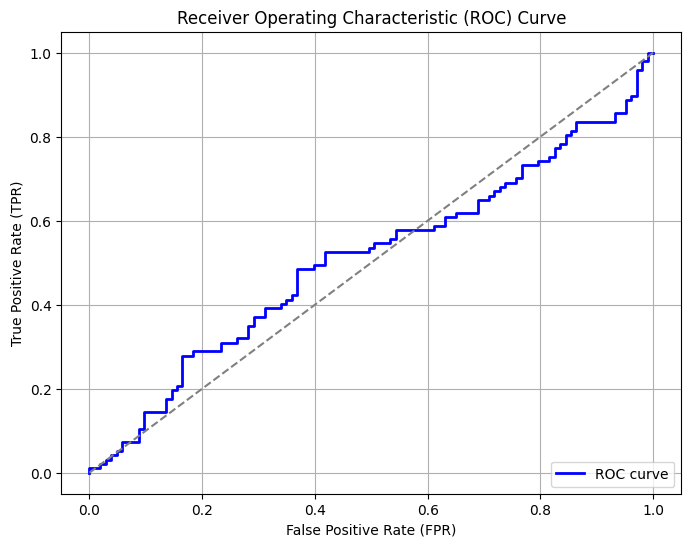

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random guessing)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [37]:
num_hidden_neurons_range =[]
activation_functions = [expit, np.tanh]
for neurons in range (2,2000):
  num_hidden_neurons_range.append(neurons)

In [38]:
eer_matrix = np.zeros((len(num_hidden_neurons_range), len(activation_functions)))

In [40]:
for i, num_hidden_neurons in enumerate(num_hidden_neurons_range):
    for j, activation_function in enumerate(activation_functions):
        # Initialize ELM model
        input_size = X_train.shape[1]
        # Fit the model
        elm_model.fit(X_train, y_train)

        # Predict using the trained model
        predictions = elm_model.predict(X_test)

        # Calculate Equal Error Rate (EER) using ROC curve
        fpr, tpr, thresholds = roc_curve(y_test, predictions)
        eer = fpr[np.argmin(np.abs(tpr - (1 - fpr)))]

        eer_matrix[i, j] = eer


In [46]:
df = pd.DataFrame(eer_matrix, index=num_hidden_neurons_range, columns=[func.__name__ for func in activation_functions])

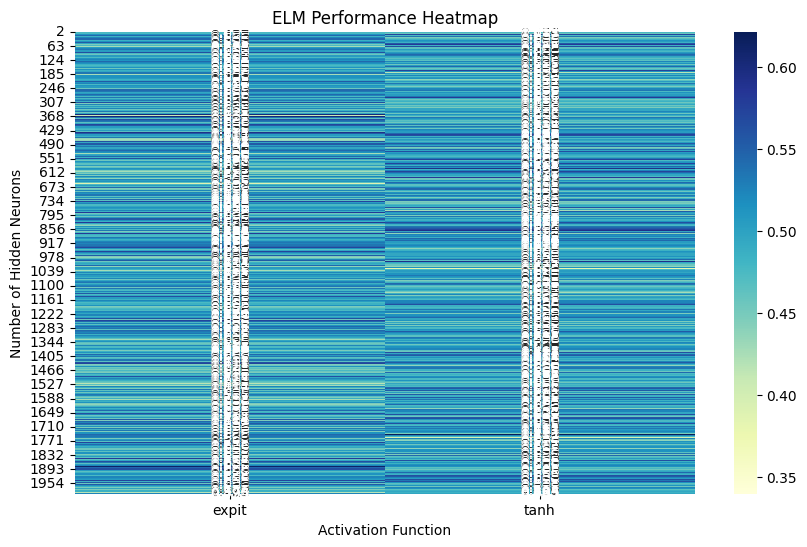

In [52]:
# plt.figure(figsize=(1, 60))
plt.figure(figsize=(10, 6))
sns.heatmap(df, cmap='YlGnBu', annot=True, fmt=".3f")
plt.xlabel('Activation Function')
plt.ylabel('Number of Hidden Neurons')
plt.title('ELM Performance Heatmap')
plt.show()

In [ ]:
X = np.random.rand(1000, 1024)
print(X)